### Import libraries

In [68]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Get data

In [154]:
base_url='https://fbref.com/en/players/dea698d9/'
player_name='Romelu-Lukaku'
url=base_url+player_name
url

'https://fbref.com/en/players/dea698d9/Romelu-Lukaku'

In [155]:
soup=BeautifulSoup(requests.get(url).text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
   <link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202109021" rel="dns-prefetch"/>
   <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
   <script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://quantcast.mgr.consensu.org'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js')
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, f

In [156]:
rows=soup.find('table', {'id':'scout_summary_FW'}).find_all('tr')

In [157]:
col_names=[x.text for x in rows[0].find_all('th')]

In [158]:
data=[]
for row in rows[1:]:
    stat=row.find('th').text
    if stat!='':
        per_90=float(row.find_all('td')[0].text.strip().replace('%',''))
        perc=float(row.find_all('td')[1].text.strip())
        data.append([stat,per_90,perc])
data

[['Non-Penalty Goals', 0.66, 91.0],
 ['npxG', 0.62, 96.0],
 ['Shots Total', 4.87, 99.0],
 ['Assists', 0.11, 40.0],
 ['xA', 0.1, 36.0],
 ['npxG+xA', 0.72, 91.0],
 ['Shot-Creating Actions', 3.68, 93.0],
 ['Passes Attempted', 34.92, 87.0],
 ['Pass Completion %', 79.0, 85.0],
 ['Progressive Passes', 2.38, 79.0],
 ['Progressive Carries', 8.33, 98.0],
 ['Dribbles Completed', 1.75, 84.0],
 ['Touches (Att Pen)', 6.77, 89.0],
 ['Progressive Passes Rec', 9.39, 83.0],
 ['Pressures', 6.69, 1.0],
 ['Tackles', 0.24, 4.0],
 ['Interceptions', 0.26, 30.0],
 ['Blocks', 0.48, 13.0],
 ['Clearances', 0.56, 40.0],
 ['Aerials won', 0.87, 17.0]]

In [159]:
df=pd.DataFrame(columns=col_names, data=data)

In [160]:
df

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.66,91.0
1,npxG,0.62,96.0
2,Shots Total,4.87,99.0
3,Assists,0.11,40.0
4,xA,0.10,36.0
5,npxG+xA,0.72,91.0
6,Shot-Creating Actions,3.68,93.0
7,Passes Attempted,34.92,87.0
8,Pass Completion %,79.00,85.0
9,Progressive Passes,2.38,79.0


### Plot a radar chart

In [217]:
subjects=['PHY','CHEM','BIO','MATH', 'ECO']
alice=[60,75,38,94,27]
bob=[81,30,75,37,86]
angles=np.linspace(0,2*np.pi,len(subjects), endpoint=False)
print(angles)

[0.         1.25663706 2.51327412 3.76991118 5.02654825]


In [218]:
angles=np.concatenate((angles,[angles[0]]))
print(angles)

[0.         1.25663706 2.51327412 3.76991118 5.02654825 0.        ]


In [219]:
subjects.append(subjects[0])
alice.append(alice[0])
bob.append(bob[0])

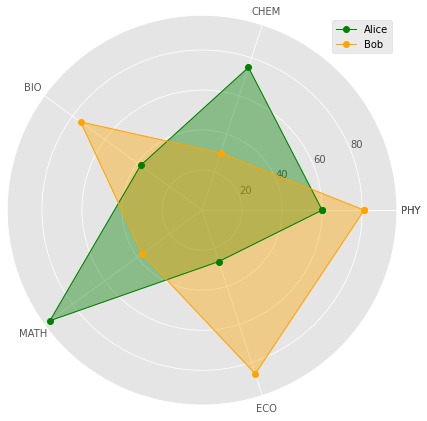

In [220]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, polar=True)

#Alice Plot
ax.plot(angles,alice, 'o-', color='g', linewidth=1, label='Alice')
ax.fill(angles, alice, alpha=0.4, color='g')

#Bob Plot
ax.plot(angles,bob, 'o-', color='orange', linewidth=1, label='Bob')
ax.fill(angles, bob, alpha=0.4, color='orange')

ax.set_thetagrids(angles * 180/np.pi, subjects)

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig('fig.png')
plt.show()

In [221]:
# Full circle
labels.append(labels[0])
vals.append(vals[0])

In [164]:
plt.style.use('ggplot')

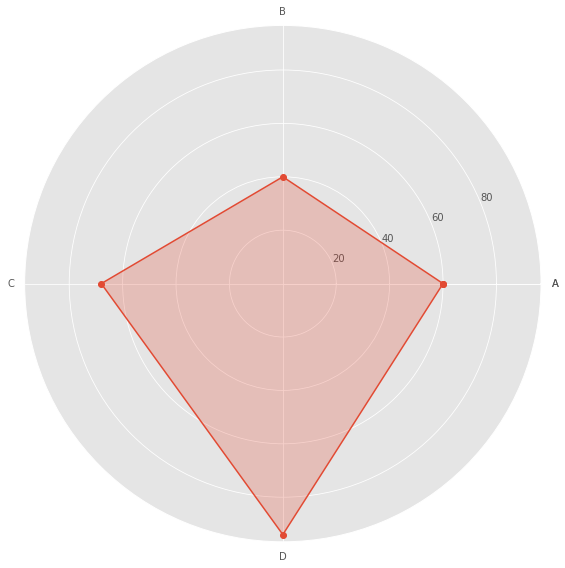

In [165]:
fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(polar=True)
ax.plot(angles, vals,'o-')
ax.fill(angles, vals, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)

ax.grid(True)
plt.tight_layout()
plt.show()

### Select KPIs

In [166]:
list(df.Statistic)

['Non-Penalty Goals',
 'npxG',
 'Shots Total',
 'Assists',
 'xA',
 'npxG+xA',
 'Shot-Creating Actions',
 'Passes Attempted',
 'Pass Completion %',
 'Progressive Passes',
 'Progressive Carries',
 'Dribbles Completed',
 'Touches (Att Pen)',
 'Progressive Passes Rec',
 'Pressures',
 'Tackles',
 'Interceptions',
 'Blocks',
 'Clearances',
 'Aerials won']

In [167]:
kpis=['npxG','xA','Shot-Creating Actions','Touches (Att Pen)','Progressive Passes','Dribbles Completed']
x=[df[df.Statistic==i].Percentile.sum() for i in kpis]
val=[df[df.Statistic==i]['Per 90'].sum() for i in kpis]

In [168]:
labels=kpis
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

In [169]:
kpis.append(kpis[0])
x.append(x[0])
val.append(val[0])

In [176]:
def plotter():
    ax=fig.add_subplot(polar=True)
    plt.plot(angles,x, 'o-', linewidth=1, label='CR7', color='r')
    ax.fill(angles, x, alpha=0.25, color='r')
    ax.set_thetagrids(angles * 180/np.pi, labels=labels, alpha=0.8)

    for i in range(len(val)):
        ax.text(angles[i],x[i]+8,val[i], color='r')

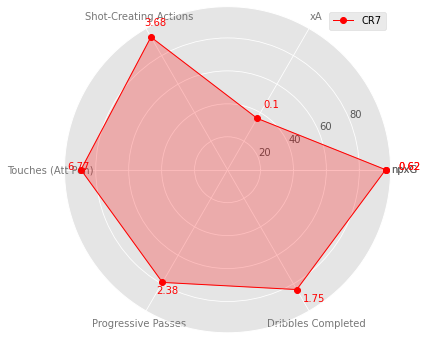

In [177]:
fig=plt.figure(figsize=(6,6))
plotter()
plt.legend()
plt.show()

In [ ]:
labels=np.array(['PAC','SHO', 'PAS', 'DRI','PHY','DEF'])
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure(figsize=(6,6))
plt.suptitle(title)
for player in players:
    stats=np.array(df[df.Name==player][labels])[0]
    stats=np.concatenate((stats,[stats[0]]))

    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2, label=player)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)

ax.grid(True)
plt.legend()
plt.tight_layout()
plt.show()